In [17]:
import os
os.chdir('C:\\Users\\jc343421\Documents\\GitHub\\AuTuMN2023\\AuTuMN\\')

from matplotlib import pyplot
from autumn.core.project import get_project
from autumn.settings.region import Region

In [19]:
# load the project
project = get_project("summer2_template", Region.PAKISTAN)

# retrieve calibration targets
targets = {t.data.name: {'times': t.data.index.to_list(), 'values': t.data.to_list()} for t in project.calibration.targets}

# run a baseline model
model = project.build_model(project.param_set.baseline.to_dict())

In [20]:
update_params = {
    "contact_rate": .25, # 0.23121097894625872
}

In [21]:
model.run(update_params)
derived_df = model.get_derived_outputs_df()

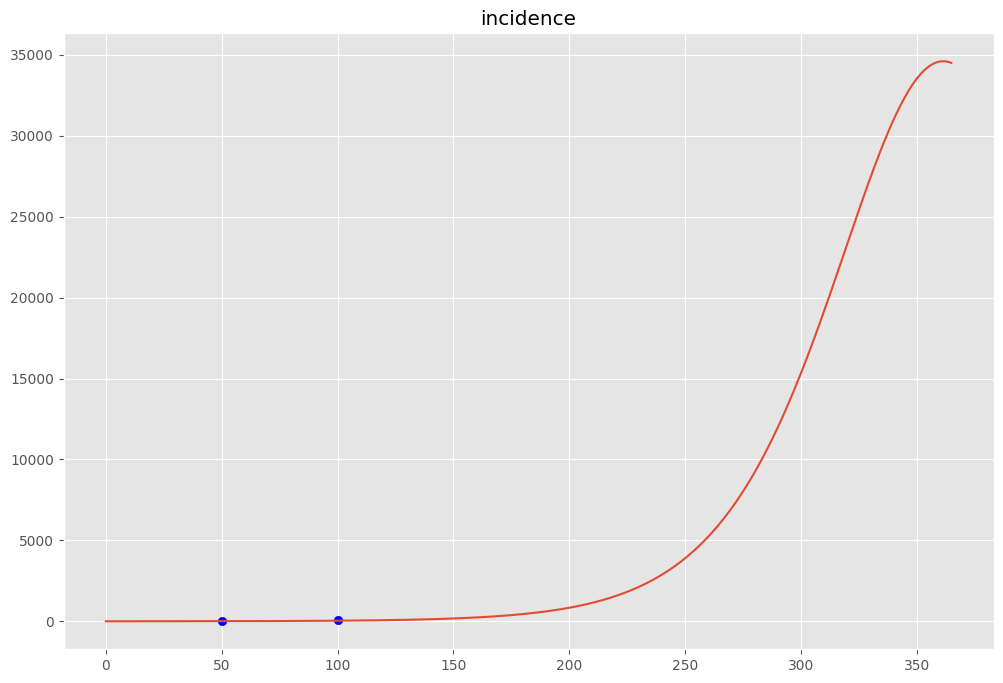

In [23]:
outputs_to_plot = ["incidence"] #, "hospital_admissions", "hospital_occupancy", "icu_admissions", "icu_occupancy"]

for output in outputs_to_plot:
    fig = pyplot.figure(figsize=(12, 8))
    pyplot.style.use("ggplot")
    axis = fig.add_subplot()

    axis = derived_df[output].plot()
    
    if output in targets:
        axis.scatter(targets[output]['times'], targets[output]['values'], color='blue')

    axis.set_title(output)

In [24]:
# project.calibration.run(project, 30, 1, 1)

In [25]:
project.param_set.baseline.to_dict()

model.compartments




NameError: name 'Parameter' is not defined